In [82]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [1]:
from src.model import GAN

In [14]:
#%load_ext autoreload
%autoreload 2

In [72]:
def plot_mnist_data(images):
    for i in range(len(images)):  
        plt.subplot(330 + 1 + i)
        plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.show()

## Model

In [58]:
gan_model = GAN()

Hello 1


In [59]:
gan_model.compile(
    d_optimizer=Adam(learning_rate=3e-4),
    g_optimizer=Adam(learning_rate=3e-4),
    loss_fn=BinaryCrossentropy(),
)

In [105]:
noise = gan_model.sample_random_noise(9)

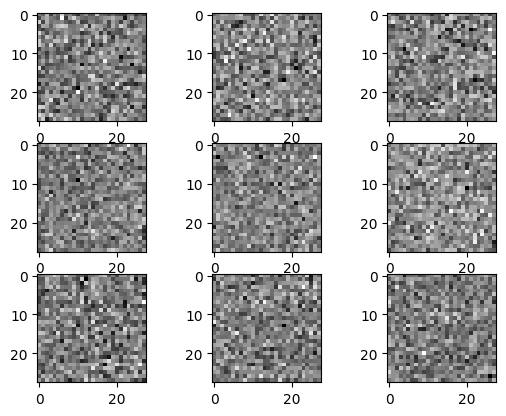

In [106]:
image_noise = noise.numpy().reshape(9, 28, 28)
image_noise = image_noise + 255
plot_mnist_data(image_noise)

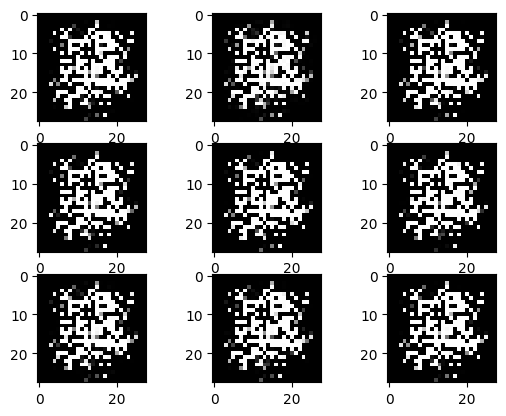

In [121]:
gan_g_output = gan_model.generator(noise)
gan_g_output = gan_g_output.numpy().reshape(9, 28, 28)
plot_mnist_data(gan_g_output + 255)

In [122]:
gan_model.discriminator(gan_g_output.reshape(-1, 28*28))

<tf.Tensor: shape=(9, 1), dtype=float32, numpy=
array([[1.6401573e-09],
       [6.8789632e-09],
       [8.6772552e-08],
       [2.0223017e-09],
       [9.4044550e-09],
       [3.6560144e-11],
       [7.7158528e-09],
       [2.4147467e-10],
       [2.9025651e-09]], dtype=float32)>

## Prep Data

In [33]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

print(f"MNIST Train Set: {x_train.shape}")
print(f"MNIST Test Set: {x_test.shape}")

MNIST Train Set: (60000, 28, 28)
MNIST Test Set: (10000, 28, 28)


In [39]:
batch_size = 64
all_digits = np.concatenate([x_train, x_test])
all_digits = all_digits.astype("float32") / 255.0
all_digits = np.reshape(all_digits, (-1, 28, 28, 1))
dataset = tf.data.Dataset.from_tensor_slices(all_digits)
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

In [52]:
all_digits[:10].shape

(10, 28, 28, 1)

In [70]:
gan_model.fit(dataset.take(100), epochs=10, batch_size=16)

Epoch 1/10
100/100 [==============================] - 1s 6ms/step - d_loss: 6.5661e-06 - g_loss: -2.2109e-09
Epoch 2/10
100/100 [==============================] - 1s 6ms/step - d_loss: 5.6607e-06 - g_loss: -2.5353e-09
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - d_loss: 5.1942e-06 - g_loss: -3.7239e-09
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - d_loss: 4.7383e-06 - g_loss: -2.8282e-09
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - d_loss: 4.5418e-06 - g_loss: -2.9917e-09
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - d_loss: 4.0273e-06 - g_loss: -3.7462e-09
Epoch 7/10
100/100 [==============================] - 1s 6ms/step - d_loss: 4.3654e-06 - g_loss: -3.3240e-09
Epoch 8/10
100/100 [==============================] - 1s 6ms/step - d_loss: 4.1051e-06 - g_loss: -3.6822e-09
Epoch 9/10
100/100 [==============================] - 1s 6ms/step - d_loss: 2.8742e-06 - g_loss: -4.4502e-09
Epoch 10/10
100/100

In [71]:
gan_model.fit(dataset.take(100), epochs=10, batch_size=16)

Epoch 1/10
100/100 [==============================] - 1s 6ms/step - d_loss: 2.2139e-06 - g_loss: -4.5830e-09
Epoch 2/10
100/100 [==============================] - 1s 6ms/step - d_loss: 2.2128e-06 - g_loss: -4.5516e-09
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - d_loss: 1.9282e-06 - g_loss: -5.4303e-09
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - d_loss: 2.4264e-06 - g_loss: -5.4289e-09
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - d_loss: 1.8055e-06 - g_loss: -5.5913e-09
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - d_loss: 1.6716e-06 - g_loss: -6.0933e-09
Epoch 7/10
100/100 [==============================] - 1s 6ms/step - d_loss: 1.5227e-06 - g_loss: -5.8079e-09
Epoch 8/10
100/100 [==============================] - 1s 6ms/step - d_loss: 1.3603e-06 - g_loss: -6.7293e-09
Epoch 9/10
100/100 [==============================] - 1s 6ms/step - d_loss: 1.2592e-06 - g_loss: -7.0370e-09
Epoch 10/10
100/100